<center><img src="images/CourseTitle.png" style="width:900px;"></center>

<center><h2>Homework 2 - Exploring Neural Network Forward and Backward Propagations</h2></center>
<br>
<center>COE49412 - Spring 2020</center>
<br><b>
Total Marks: 10<br>
Due Date: Monday, 23-Mar-2020, 11.59pm</b><br><br>
<b><i><u>Please enter your Student ID & Name below:</u><i></b>

In [1]:
## Student ID: b00069350
## Student Name: Danayal Khan

<hr>

- Recall that the derivative of the <b>softmax</b> function $f(z)=\frac{e^z}{\sum_i e^z}$ is $f'(z)=\frac{e^z}{\sum_i e^z} - \frac{(e^z)^2}{(\sum_i e^z)^2}$

In [64]:

# imports and Sigmoid, Sigmoid derivative, softmax activation functions

import numpy as np
import pandas as pd
import seaborn as sns


def sigmoid(X):
    return 1 / (1 + np.exp(-X))


def sigmoid_df(x):
    return sigmoid(x) * (1 - sigmoid(x))


def softmax(X):
    expo = np.exp(X)
    expo_sum = np.sum(np.exp(X))
    return expo / expo_sum


def softmax_df(x):
    e_x = np.exp(x)
    return e_x / e_x.sum() - e_x ** 2 / e_x.sum() ** 2


def relu(X):
    return np.maximum(0, X)


def relu_df(x):
    x[x <= 0] = 0
    x[x > 0] = 1
    return x


def loss(x, y):
    return 0.5 * (x - y) * (x - y)





**Exercise 1 [2 marks]**

Consider the following simple 2-layer neural network architecture containing one input, one hidden layer with a single node, and one output. By using a step-by-step approach by hand, calculate the results of a <b><i>single iteration</i></b> of <b>Forward and Backward propagation</b> and print <b>1)</b> the predicted value, $a_{2}$, of the network after the first forward pass, and <b>2)</b> the updated values of the parameters <b>weights</b> and <b>biases</b> after the first backward pass. You may refer to your lecture notebook for examples.

<img src="images/NN_HW2_EX1.png" style="width:600px;"><caption><center><b>Figure 1</b>: 2-layer neural network. <i><u>Note</u>: notations shown differ from your lecture notes.</i></center></caption><br>

**Instructions**:

- For this exercise, use the <b>activation</b> function $f(z)$ as the **sigmoid** function: $\sigma(z) = \frac{1}{ 1 + e^{(-z)}}$

    - Note the derivative of the sigmoid function $\sigma'(z) = \sigma(z) \cdot (1 - \sigma(z))$

- Assume the model is fed with only <b>one input data point</b> with the actual ground truth value $y = 0.25$ for the given input $x = 0.1$

- Use the **Loss** function as: $Loss = \frac{1}{2} (y - a_{2})^{2}$

    - Note the partial derivative of the $Loss$ function $\frac {\partial Loss}{\partial a_{2}} = -(y - a_{2})$

- Use the <b>learning rate</b> $\eta = 0.4$

- The initial <b>weights</b>, $w$, are given as: $\begin{bmatrix} w_{1}=0.15 & w_{2}=0.45 \end{bmatrix}$

- The initial <b>biases</b>, $b$, are given as: $\begin{bmatrix} b_{1}=0.40 & b_{2}=0.65 \end{bmatrix}$ 

<i><b>Hints</b></i>:<br><br>
For backward pass, you may want to recall that using Gradient descent (refer your lecture notes):

- $w_{1\, updated} = w_{1} - \eta \frac {\partial Loss}{\partial w_{1}}$
- $w_{2\, updated} = w_{2} - \eta \frac {\partial Loss}{\partial w_{2}}$
- $b_{1\, updated} = b_{1} - \eta \frac {\partial Loss}{\partial b_{1}}$
- $b_{2\, updated} = b_{2} - \eta \frac {\partial Loss}{\partial b_{2}}$
- And using the chain rule:
    - $\frac {\partial Loss}{\partial w_{2}} = \frac {\partial Loss}{\partial a_{2}} \cdot \frac {\partial a_{2}}{\partial z_{2}} \cdot \frac {\partial z_{2}}{\partial w_{2}} = (-(y - a_{2})) \cdot (a_{2} (1-a_{2})) \cdot a_{1}$
    - $\frac {\partial Loss}{\partial b_{2}} = \frac {\partial Loss}{\partial a_{2}} \cdot \frac {\partial a_{2}}{\partial z_{2}} \cdot \frac {\partial z_{2}}{\partial b_{2}} = (-(y - a_{2})) \cdot (a_{2} (1-a_{2})) \cdot 1$
    - $\frac {\partial Loss}{\partial w_{1}} = \frac {\partial Loss}{\partial a_{2}} \cdot \frac {\partial a_{2}}{\partial z_{2}} \cdot \frac {\partial z_{2}}{\partial a_{1}} \cdot \frac {\partial a_{1}}{\partial z_{1}}  \cdot \frac {\partial z_{1}}{\partial w_{1}} = (-(y - a_{2})) \cdot (a_{2} (1-a_{2})) \cdot (w_{2}) \cdot (a_{1} (1-a_{1})) \cdot x_{1}$
    - $\frac {\partial Loss}{\partial b_{1}} = \frac {\partial Loss}{\partial a_{2}} \cdot \frac {\partial a_{2}}{\partial z_{2}} \cdot \frac {\partial z_{2}}{\partial a_{1}} \cdot \frac {\partial a_{1}}{\partial z_{1}}  \cdot \frac {\partial z_{1}}{\partial b_{1}} = (-(y - a_{2})) \cdot (a_{2} (1-a_{2})) \cdot (w_{2}) \cdot (a_{1} (1-a_{1})) \cdot 1$


In [66]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
### ENTER YOUR CODE HERE ###

# weights

w1 = np.array([0.15])
w2 = np.array([0.45])

# bias

b1 = np.array([0.40])
b2 = np.array([0.65])

# x and y

x = np.array([[0.1]])
y = 0.25

print ('x=\n', x)
print ('y=\n', y)

##  Forward Pass  ###

# z(1) = x . W1

z1 = np.dot(x, w1) + b1
print ('z1=\n', z1)
a1 = sigmoid(z1)
print ('a1=\n', a1)

# z2 = a1 . W2 T

z2 = np.dot(a1, w2.T) + b2
print ('z2=\n', z2)
a2 = sigmoid(z2)
print ('a2=\n', a2)

## Backward Pass ###

# calculate delweight from last layer

del2 = 1 * (a2 - y) * sigmoid_df(z2)
print ('del2=\n', del2)

# calculater del1 weight recursively

del1 = w2 * del2 * sigmoid_df(z1)
print ('del1=\n', del1)

# calculate all the derivitives for weights

dlossdW2 = del2 * a1
print ('dLoss/dW2=\n', dlossdW2)
dlossdW1 = np.dot(x.T, del1)
print ('dLoss/dW1=\n', dlossdW1)

dlossB2 = del2
dlossB1 = del1

# update w1 and w2

eta = 0.40

print ('original w1=\n', w1)
print ('original w2=\n', w2)

print ('original b1=\n', b1)
print ('original b2=\n', b2)

# Update and print w1 and w2

w1 = w1 - eta * dlossdW1
print ('Updated w1=\n', w1)
w2 = w2 - eta * dlossdW2
print ('Updated w2=\n', w2)

# Update and print b1 and b2

b1 = b1 - eta * dlossB1
print ('Updated b1 =\n', b1)

b2 = b2 - eta * dlossB2
print ('Updated b2 =\n', b2)

			

x=
 [[0.1]]
y=
 0.25
z1=
 [0.415]
a1=
 [0.60228618]
z2=
 [0.92102878]
a2=
 [0.71525168]
del2=
 [0.09475628]
del1=
 [0.01021396]
dLoss/dW2=
 [0.0570704]
dLoss/dW1=
 [0.0010214]
original w1=
 [0.15]
original w2=
 [0.45]
original b1=
 [0.4]
original b2=
 [0.65]
Updated w1=
 [0.14959144]
Updated w2=
 [0.42717184]
Updated b1 =
 [0.39591442]
Updated b2 =
 [0.61209749]


**Expected Output(s)**: 
<table style = "width:20%">
    <tr>
        <td><center><b>$a_{2}$</b></center></td> 
        <td><center></b>0.7153</b></center></td> 
    </tr>
    <tr>
        <td><center><b>$w_{1\, updated}$</b></center></td> 
        <td><center></b>0.1496</b></center></td> 
    </tr>
    <tr>
        <td><center><b>$w_{2\, updated}$</b></center></td> 
        <td><center></b>0.4272</b></center></td> 
    </tr>
    <tr>
        <td><center><b>$b_{1\, updated}$</b></center></td> 
        <td><center></b>0.3959</b></center></td> 
    </tr>
    <tr>
        <td><center><b>$b_{2\, updated}$</b></center></td> 
        <td><center></b>0.6121</b></center></td> 
    </tr>
</table>

<hr>

**Exercise 2 [3 marks]**

Consider now a slightly larger variation of the above neural network architecture containing two inputs, one hidden layer with three nodes, and one output. By using a similar step-by-step approach by hand, calculate the results of a <b><i>single iteration</i></b> of <b>Forward and Backward propagation</b> and print <b>1)</b> the predicted value, $a_{4}$, of the network after the first forward pass, and <b>2)</b> the updated values of the parameters <b>weights</b> and <b>biases</b> after the first backward pass. You may refer to your lecture notebook for examples.

<img src="images/NN_HW2_EX2.png" style="width:600px;"><caption><center><b>Figure 2</b>: Neural network with 2 inputs, 1 hidden layer with 3 nodes, and 1 output.<br><i><u>Note</u>: notations shown differ from your lecture notes.</i></center></caption><br>


**Instructions**:

- For this exercise, use the <b>activation</b> function $f(z)$ as the **sigmoid** function: $\sigma(z) = \frac{1}{ 1 + e^{(-z)}}$

    - Note the derivative of the sigmoid function $\sigma'(z) = \sigma(z) \cdot (1 - \sigma(z))$

- Assume the model is fed with only <b>one input data point</b> with the actual ground truth value $y = 0.25$ for the given inputs $x_{1} = 0.1$ and $x_{2} = 0.35$

- Use the **Loss** function as: $Loss = \frac{1}{2} (y - a_{4})^{2}$

    - Note the partial derivative of the $Loss$ function $\frac {\partial Loss}{\partial a_{4}} = -(y - a_{4})$

- Use the <b>learning rate</b> $\eta = 0.4$

- The initial <b>weights</b>, $w$, are given as: $\begin{bmatrix} w_{1}=0.15 & w_{2}=0.45 & w_{3}=-0.35 & w_{4}=-0.61 & w_{5}=-0.52 & w_{6}=0.22 & w_{7}=-0.72 & w_{8}=1.22 & w_{9}=-0.30 \end{bmatrix}$

- The initial <b>biases</b>, $b$, are given as: $\begin{bmatrix} b_{1}=0.40 & b_{2}=0.65 & b_{3}=0.23 & b_{4}=0.15 \end{bmatrix}$ 

In [79]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
### ENTER YOUR CODE HERE ###

# weights

# weight one will be of shape 2 x 3
# weight 2 will be of shape 3 x 1

w1 = np.array([[0.15, -0.35, -0.52], [0.45, -0.61, 0.22]])

w2 = np.array([[-0.72], [1.22], [-0.30]])

b1 = np.array([[0.40, 0.65, 0.23]])
b2 = np.array([[0.15]])


# x and y

x = np.array([[0.1, 0.35]])
y = 0.25

print ('x=\n', x)
print ('y=\n', y)

##  Forward Pass  ###


z1 = np.dot(x, w1) + b1
print ('z1=\n', z1)
a1 = sigmoid(z1)
print ('a1=\n', a1)


z2 = np.dot(a1, w2) + b2
print ('z2=\n', z2)

a2 = sigmoid(z2)
print ('a2=\n', a2)

## Backward Pass ###



# calculate delweight from last layer

del2 = 1 * (a2 - y) * sigmoid_df(z2)
print ('del2=\n', del2)

# calculater del1 weight recursively

del1 = w2.T * del2 * sigmoid_df(z1)
print('del1=\n', del1)


# calculate all the derivitives for weights

dlossdW2 = del2 * a1
print ('dLoss/dW2=\n', dlossdW2)
dlossdW1 = np.dot(x.T, del1)
print ('dLoss/dW1=\n', dlossdW1)

dlossB2 = del2
dlossB1 = del1

# update w1 and w2

eta = 0.40

print ('original w1=\n', w1)
print ('original w2=\n', w2)

print ('original b1=\n', b1)
print ('original b2=\n', b2)

# Update and print w1 and w2

w1 = w1 - eta * dlossdW1
print ("Updated w1=", w1)

w2 = w2 - eta * dlossdW2.T
print ('Updated w2=\n', w2)

# Update and print b1 and b2

b1 = b1 - eta * dlossB1
print ('Updated b1 =\n', b1)

b2 = b2 - eta * dlossB2
print ('Updated b2 =\n', b2)

			

x=
 [[0.1  0.35]]
y=
 0.25
z1=
 [[0.5725 0.4015 0.255 ]]
a1=
 [[0.63933984 0.599048   0.56340679]]
z2=
 [[0.25149184]]
a2=
 [[0.56254366]]
del2=
 [[0.07691333]]
del1=
 [[-0.01276921  0.02253801 -0.00567573]]
dLoss/dW2=
 [[0.04917376 0.04607478 0.04333349]]
dLoss/dW1=
 [[-0.00127692  0.0022538  -0.00056757]
 [-0.00446922  0.0078883  -0.00198651]]
original w1=
 [[ 0.15 -0.35 -0.52]
 [ 0.45 -0.61  0.22]]
original w2=
 [[-0.72]
 [ 1.22]
 [-0.3 ]]
original b1=
 [[0.4  0.65 0.23]]
original b2=
 [[0.15]]
Updated w1= [[ 0.15051077 -0.35090152 -0.51977297]
 [ 0.45178769 -0.61315532  0.2207946 ]]
Updated w2=
 [[-0.7396695 ]
 [ 1.20157009]
 [-0.3173334 ]]
Updated b1 =
 [[0.40510768 0.6409848  0.23227029]]
Updated b2 =
 [[0.11923467]]


**Expected Output(s)**: 
<table style = "width:50%">
    <tr>
        <td><center><b>$a_{4}$</b></center></td> 
        <td><center></b>0.5625</b></center></td> 
    </tr>
    <tr>
        <td><center>$W_{Layer\, 1\, updated} = \begin{bmatrix}0.1505\\ 0.4518\\ \text{-}0.3509\\ \text{-}0.6131\\ \text{-}0.5198\\0.2208\end{bmatrix}$</center></td> 
        <td><center>$W_{Output Layer\, updated} = \begin{bmatrix}\text{-}0.7397\\ 1.202\\ \text{-}0.3173\end{bmatrix}$</center></td>     
</tr>
    <tr>
        <td><center>$b_{Layer\, 1\, updated} = \begin{bmatrix}0.4051\\ 0.6410\\ 0.2323\end{bmatrix}$</center></td> 
        <td><center>$b_{Output Layer\, updated} = \begin{bmatrix}0.1192\end{bmatrix}$</center></td>     
</tr>
</table>

<hr>

**Exercise 3 [3 marks]**

Consider now a more general version of the above neural network architecture containing two inputs, two hidden layers, and two outputs. By using a <i>generalized</i> approach, calculate the results of a <b><i>single iteration</i></b> of <b>Forward and Backward propagation</b> and print <b>1)</b> the predicted values, $a_{8}$ and $a_{9}$, of the network after the first forward pass, and <b>2)</b> the updated values of the parameters <b>weights</b> and <b>biases</b> after the first backward pass. You may refer to your lecture notebook for examples.

<img src="images/NN_HW2_EX3.png" style="width:1000px;"><caption><center><b>Figure 3</b>: Neural network with 2 inputs, 2 hidden layers, and 2 outputs.<br><i><u>Note</u>: notations shown differ from your lecture notes.</i></center></caption><br>


**Instructions**:

- For this exercise, use the <b>activation</b> function $f(z)$ as the **sigmoid** function: $\sigma(z) = \frac{1}{ 1 + e^{(-z)}}$

    - Note the derivative of the sigmoid function $\sigma'(z) = \sigma(z) \cdot (1 - \sigma(z))$

- Assume the model is fed with only <b>one input data point</b> with the actual ground truth values $y_{1} = 0.25$ and $y_{2} = 0.4$ for the given inputs $x_{1} = 0.1$ and $x_{2} = 0.35$

- Use the **Loss** function as: $Loss = \frac{1}{2} (y - a_{output})^{2}$

    - Note the partial derivative of the $Loss$ function $\frac {\partial Loss}{\partial a_{output}} = -(y - a_{output})$

- Use the <b>learning rate</b> $\eta = 0.4$

- The initial <b>weights</b>, $w$, are given as:
    - $W_{Layer\, 1:\, w_{1}\,\text{to}\,w_{6}} = \begin{bmatrix}0.45 & 0.83 & 0.62 & 0.84 & 0.22 & 0.86\end{bmatrix}^T$
    - $W_{Layer\, 2:\, w_{7}\,\text{to}\,w_{18}} = \begin{bmatrix}0.78 & 1.03 & 0.43 & 0.98 & 0.39 & 0.42 & -0.05 & 1.11 & 0.99 & 0.79 & 0.52 & 1.08\end{bmatrix}^T$
    - $W_{Output\, Layer:\, w_{19}\,\text{to}\,w_{26}} = \begin{bmatrix}0.79 & 0.62 & -0.32 & 0.65 & 0.52 & -0.78 & 0.41 & 0.91\end{bmatrix}^T$
- The initial <b>biases</b>, $b$, are given as:
    - $b_{Layer\, 1:\, b_{1}\,\text{to}\,b_{3}} = \begin{bmatrix}0.1 & 1.03 & 0.59\end{bmatrix}^T$
    - $b_{Layer\, 2:\, b_{4}\,\text{to}\,b_{7}} = \begin{bmatrix}0.47 & 0.29 & -0.51 & 1.15\end{bmatrix}^T$
    - $b_{Output\, Layer:\, b_{8}\,\text{to}\,b_{9}} = \begin{bmatrix}0.92 & -0.6\end{bmatrix}^T$

In [73]:
### ENTER YOUR CODE HERE ###


#weights

#weight 1 will be of shape 2 x 3
#weight 2 will be of shape 3 x 4
#weight 3 will be of shape 4 x 2




w1 = np.array( [  [0.45,0.62, 0.22 ] , [0.83,0.84 ,0.86 ]] )


w2 = np.array( [   [0.78,0.98,-0.05,0.79] , [1.03,0.39,1.11,0.52], [0.43,0.42,0.99,1.08]] )

w3 = np.array ([   [0.79,0.52] , [0.62,-0.78] , [-0.32,0.41] , [0.65,0.91]            ])

b1 = np.array ([[0.1, 1.03, 0.59]])
b2 = np.array ([[0.47,0.29,-0.51,1.15]])
b3 = np.array ([[0.92,-0.6]])

print("w1 shape", w1.shape)
print("w2 shape", w2.shape)
print("w3 shape", w3.shape)


print("b1 shape", b1.shape)
print("b1 shape", b2.shape)
print("b3 shape", b3.shape)


# x and y
x = np.array([[0.1, 0.35]])
y = np.array([[0.25, 0.4]])

print("x=\n",x)
print("y=\n",y)


##  Forward Pass  ###

# z(1) = x . W1
z1 = np.dot(x,w1) + b1
print("z1=\n",z1) 
a1 = sigmoid(z1) 
print("a1=\n",a1)

# z2 = a1 . W2 T
z2 = np.dot(a1,w2) + b2
print("z2=\n",z2)

a2 = sigmoid(z2)
print("a2=\n",a2)

z3 = np.dot(a2,w3) + b3
print("z3=\n", z3)
a3 = sigmoid(z3)
print("a3 =\n", a3)

## Backward Pass ###


print("\nz2 shape", z2.shape)
print("\ndel2 shape", del2.shape)

print("\nz1 shape ", z1.shape)
print("\n w2 shape", w2.shape)



# calculate delweight from last layer 
del3 = 1 * (a3-y) * sigmoid_df(z3)
print("del3=\n", del3)

# calculater del1 weight recursively

print(w3.T.shape)
print(del3.shape)
print(sigmoid(z2).shape)

del2 = del3 @ w3.T * sigmoid_df(z2)
print("del2=\n", del2)

del1 = del2 @ w2.T* sigmoid_df(z1)
print("del1=\n", del1)



# calculate all the derivitives for weights
dlossdW3 = del3.T * a2
print("dLoss/dW3=\n", dlossdW3)

dlossdW2 = a1.T * del2 
print("dLoss/dW2=\n", dlossdW2)
dlossdW1 = np.dot(x.T,del1)
print("dLoss/dW1=\n", dlossdW1)

dlossB3 = del3
dlossB2 = del2
dlossB1 = del1

# update w1 and w2

eta = 0.4

print("original w1=\n", w1)
print("original w2=\n", w2)
print("original w3=\n", w3)



print("original b1=\n", b1)
print("original b2=\n", b2)
print("original b3=\n", b3)


# Update and print w1 and w2 

w1 = w1 - eta*dlossdW1
print("\nUpdated w1=\n",w1)

w2 = w2 - eta*dlossdW2
print("Updated w2=\n",w2)

w3 = w3 - eta*dlossdW3.T
print("Updated w3=\n",w3)

# Update and print b1 and b2
b1 = b1 - eta*dlossB1
print ("Updated b1 =\n", b1)

b2 = b2 - eta*dlossB2
print ("Updated b2 =\n", b2)


b3 = b3 - eta*dlossB3
print ("Updated b3 =\n", b3)
			

w1 shape (2, 3)
w2 shape (3, 4)
w3 shape (4, 2)
b1 shape (1, 3)
b1 shape (1, 4)
b3 shape (1, 2)
x=
 [[0.1  0.35]]
y=
 [[0.25 0.4 ]]
z1=
 [[0.4355 1.386  0.913 ]]
a1=
 [[0.60718625 0.7999529  0.71361366]]
z2=
 [[2.07441064 1.49674189 1.05406593 2.8163554 ]]
a2=
 [[0.88839104 0.81708804 0.7415549  0.94355327]]
z3=
 [[2.50443556 0.38730565]]
a3 =
 [[0.92445218 0.59563392]]

z2 shape (1, 4)

del2 shape (1, 4)

z1 shape  (1, 3)

 w2 shape (3, 4)
del3=
 [[0.04710397 0.04711924]]
(2, 4)
(1, 2)
(1, 4)
del2=
 [[ 0.00611911 -0.00112817  0.00081368  0.00391444]]
del1=
 [[0.00160256 0.00140847 0.00146952]]
dLoss/dW3=
 [[0.04184675 0.03848809 0.03493018 0.04444511]
 [0.04186031 0.03850057 0.03494151 0.04445952]]
dLoss/dW2=
 [[ 0.00371544 -0.00068501  0.00049405  0.00237679]
 [ 0.004895   -0.00090248  0.0006509   0.00313137]
 [ 0.00436668 -0.00080508  0.00058065  0.0027934 ]]
dLoss/dW1=
 [[0.00016026 0.00014085 0.00014695]
 [0.0005609  0.00049296 0.00051433]]
original w1=
 [[0.45 0.62 0.22]
 [0.83 0

**Expected Output(s)**: 
<table style = "width:70%">
    <tr>
        <td colspan=3><center><b>$a_{8}$</b></center></td> 
        <td colspan=3><center></b>0.9244</b></center></td> 
    </tr>
    <tr>
        <td colspan=3><center><b>$a_{9}$</b></center></td> 
        <td colspan=3><center></b>0.5956</b></center></td> 
    </tr>
    <tr>
    <td colspan=2><center>$W_{Layer\, 1\, updated} = \begin{bmatrix}0.4499\\0.8297\\0.6199\\0.8398\\0.2199\\0.8597\end{bmatrix}$</center></td>
    <td colspan=2><center>$W_{Layer\, 2\, updated} = \begin{bmatrix}0.7785\\1.0280\\0.4282\\0.9802\\0.3903\\0.4203\\-0.0501\\1.1097\\0.9897\\0.7890\\0.5187\\1.0788\end{bmatrix}$</center></td> 
    <td colspan=2><center>$W_{Output Layer\, updated} = \begin{bmatrix}0.7732\\0.6046\\-0.3339\\0.6322\\0.5032\\-0.7954\\0.3960\\0.8922\end{bmatrix}$</center></td> 
    </tr>
    <tr>
    <td colspan=2><center>$b_{Layer\, 1\, updated} = \begin{bmatrix}0.0993\\1.0294\\0.5894\end{bmatrix}$</center></td>
    <td colspan=2><center>$b_{Layer\, 2\, updated} = \begin{bmatrix}0.4675\\0.2904\\-0.5103\\1.1484\end{bmatrix}$</center></td>
    <td colspan=2><center>$b_{Output Layer\, updated} = \begin{bmatrix}0.9011\\-0.6188\end{bmatrix}$</center></td> 
    </tr>
</table>

<hr>

**Exercise 4 [2 marks]**

Consider now replacing the <b>sigmoid activation function</b> in Exercise 3 with the <b>softmax activation function</b>: $f(z)=\frac{e^z}{\sum_i e^z}$ in the <b>output layer</b>, and the <b>ReLU activation function</b>: $f(z)=max(0,z)$ in the two <b>hidden layers</b>. Run your code from Exercise 3 for <b>50 iterations</b> and plot the $Loss$ function against the number of iterations. Compare your results with the <b>sigmoid</b> activation based hidden layers architecture in Exercise 3 and comment on your observations. You may refer to your lecture notebook for examples.

<i><b>Hints</b></i>:<br>
- Account for the vanishing gradient problem
- Recall that the derivative of the <b>softmax</b> function $f(z)=\frac{e^z}{\sum_i e^z}$ is $f'(z)=\frac{e^z}{\sum_i e^z} - \frac{(e^z)^2}{(\sum_i e^z)^2}$
- Recall that the derivative of the <b>ReLU</b> function $f(z)=max(0,z)$ is $f(z) = \left\{\begin{matrix}0 \;\;\text{if} \; z<0\\1 \;\;\text{if} \; z>0\end{matrix}\right.$
- Sample indicative output plot shown below (your values may differ)

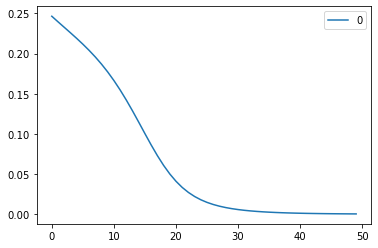

In [58]:
#Same as exercise 3. ALL SIGMOIDS

### ENTER YOUR CODE HERE ###


#weights

#weight 1 will be of shape 2 x 3
#weight 2 will be of shape 3 x 4
#weight 3 will be of shape 4 x 2




w1 = np.array( [  [0.45,0.62, 0.22 ] , [0.83,0.84 ,0.86 ]] )


w2 = np.array( [   [0.78,0.98,-0.05,0.79] , [1.03,0.39,1.11,0.52], [0.43,0.42,0.99,1.08]] )

w3 = np.array ([   [0.79,0.52] , [0.62,-0.78] , [-0.32,0.41] , [0.65,0.91]            ])

b1 = np.array ([[0.1, 1.03, 0.59]])
b2 = np.array ([[0.47,0.29,-0.51,1.15]])
b3 = np.array ([[0.92,-0.6]])



# x and y
x = np.array([[0.1, 0.35]])
y = np.array([[0.25, 0.4]])



los = np.zeros((50))


##  Forward Pass  ###

for i in range(50):

    # z(1) = x . W1
    z1 = np.dot(x,w1) + b1
    a1 = sigmoid(z1) 

    # z2 = a1 . W2 T
    z2 = np.dot(a1,w2) + b2

    a2 = sigmoid(z2)

    z3 = np.dot(a2,w3) + b3
    a3 = sigmoid(z3)    
    
    ##Loss
    
    totalloss = loss(a3,y)[0][0] + loss(a3,y)[0][1]
    los[i] = totalloss
         
    
    ## Backward Pass ###


    # calculate delweight from last layer 
    del3 = 1 * (a3-y) * sigmoid_df(z3)

    # calculater del1 weight recursively

    del2 = del3 @ w3.T * sigmoid_df(z2)

    del1 = del2 @ w2.T* sigmoid_df(z1)


    # calculate all the derivitives for weights
    dlossdW3 = del3.T * a2

    dlossdW2 = a1.T * del2 
    dlossdW1 = np.dot(x.T,del1)

    dlossB3 = del3
    dlossB2 = del2
    dlossB1 = del1

    # update w1 and w2

    eta = 0.4


    # Update and print w1 and w2 

    w1 = w1 - eta*dlossdW1

    w2 = w2 - eta*dlossdW2

    w3 = w3 - eta*dlossdW3.T

    # Update and print b1 and b2
    b1 = b1 - eta*dlossB1

    b2 = b2 - eta*dlossB2


    b3 = b3 - eta*dlossB3
    
df = pd.DataFrame(los)

sns.lineplot(data=df)

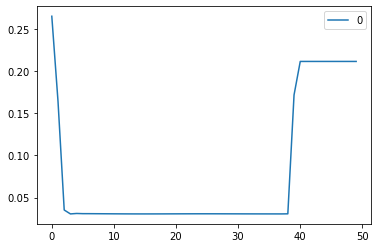

In [74]:
### ENTER YOUR CODE HERE ###

#Softmax and ReLU


#weights

#weight 1 will be of shape 2 x 3
#weight 2 will be of shape 3 x 4
#weight 3 will be of shape 4 x 2




w1 = np.array( [  [0.45,0.62, 0.22 ] , [0.83,0.84 ,0.86 ]] )


w2 = np.array( [   [0.78,0.98,-0.05,0.79] , [1.03,0.39,1.11,0.52], [0.43,0.42,0.99,1.08]] )

w3 = np.array ([   [0.79,0.52] , [0.62,-0.78] , [-0.32,0.41] , [0.65,0.91]            ])

b1 = np.array ([[0.1, 1.03, 0.59]])
b2 = np.array ([[0.47,0.29,-0.51,1.15]])
b3 = np.array ([[0.92,-0.6]])


# x and y
x = np.array([[0.1, 0.35]])
y = np.array([[0.25, 0.4]])


los = np.zeros((50))


##  Forward Pass  ###50

for i in range(50):

    # z(1) = x . W1
    z1 = np.dot(x,w1) + b1
    a1 = relu(z1) 

    # z2 = a1 . W2 T
    z2 = np.dot(a1,w2) + b2

    a2 = relu(z2)

    z3 = np.dot(a2,w3) + b3
    a3 = softmax(z3)

    
    
    ##Loss
   
    totalloss = loss(a3,y)[0][0] + loss(a3,y)[0][1]

    los[i] = totalloss
    
    
    
    ## Backward Pass ###




    # calculate delweight from last layer 
    del3 = 1 * (a3-y) * softmax_df(z3)

    # calculater del1 weight recursively

   
    del2 = del3 @ w3.T * relu_df(z2)

    del1 = del2 @ w2.T* relu_df(z1)



    # calculate all the derivitives for weights
    dlossdW3 = del3.T * a2

    dlossdW2 = a1.T * del2 
    dlossdW1 = np.dot(x.T,del1)

    dlossB3 = del3
    dlossB2 = del2
    dlossB1 = del1

    # update w1 and w2

    eta = 0.4
    



    # Update and print w1 and w2 

    w1 = w1 - eta*dlossdW1

    w2 = w2 - eta*dlossdW2

    w3 = w3 - eta*dlossdW3.T

    # Update and print b1 and b2
    b1 = b1 - eta*dlossB1

    b2 = b2 - eta*dlossB2


    b3 = b3 - eta*dlossB3
    
df2 = pd.DataFrame(los)

sns.lineplot(data=df2)


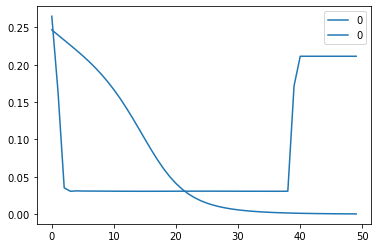

In [75]:
#eta = 0.4 for both

#df for sigmoid sigmoid sigmoid
#df2 for reLU reLU softmax

sns.lineplot(data=df)
sns.lineplot(data=df2)


With the same learning rate, the sigmoid sigmoid sigmoid neural network takes more iterations to reach the same loss value and continues to decrease the loss. The relu relu softmax function's learnin rate is too high; the gradient of the line is too high and converges to a oss of 0.05 before a sudden spike. This could be explained by the vanishing gradient problem. The learning rate should be adjusted so that the neural network does not get stuck in a local minima or does not miss the global minima and converge to a wrong value. The next cell contains the graphs for when sigmoid sigmoid sigmoid remains at eta = 0.4 while relu relu softmax's eta is changed to 0.1

In [76]:
### ENTER YOUR CODE HERE ###

#Softmax and ReLU


#weights

#weight 1 will be of shape 2 x 3
#weight 2 will be of shape 3 x 4
#weight 3 will be of shape 4 x 2




w1 = np.array( [  [0.45,0.62, 0.22 ] , [0.83,0.84 ,0.86 ]] )


w2 = np.array( [   [0.78,0.98,-0.05,0.79] , [1.03,0.39,1.11,0.52], [0.43,0.42,0.99,1.08]] )

w3 = np.array ([   [0.79,0.52] , [0.62,-0.78] , [-0.32,0.41] , [0.65,0.91]            ])

b1 = np.array ([[0.1, 1.03, 0.59]])
b2 = np.array ([[0.47,0.29,-0.51,1.15]])
b3 = np.array ([[0.92,-0.6]])


# x and y
x = np.array([[0.1, 0.35]])
y = np.array([[0.25, 0.4]])


los = np.zeros((50))


##  Forward Pass  ###50

for i in range(50):

    # z(1) = x . W1
    z1 = np.dot(x,w1) + b1
    a1 = relu(z1) 

    # z2 = a1 . W2 T
    z2 = np.dot(a1,w2) + b2

    a2 = relu(z2)

    z3 = np.dot(a2,w3) + b3
    a3 = softmax(z3)

    
    
    ##Loss
   
    totalloss = loss(a3,y)[0][0] + loss(a3,y)[0][1]

    los[i] = totalloss
    
    
    
    ## Backward Pass ###




    # calculate delweight from last layer 
    del3 = 1 * (a3-y) * softmax_df(z3)

    # calculater del1 weight recursively

   
    del2 = del3 @ w3.T * relu_df(z2)

    del1 = del2 @ w2.T* relu_df(z1)



    # calculate all the derivitives for weights
    dlossdW3 = del3.T * a2

    dlossdW2 = a1.T * del2 
    dlossdW1 = np.dot(x.T,del1)

    dlossB3 = del3
    dlossB2 = del2
    dlossB1 = del1

    # update w1 and w2

    eta = 0.1
    


    # Update and print w1 and w2 

    w1 = w1 - eta*dlossdW1

    w2 = w2 - eta*dlossdW2

    w3 = w3 - eta*dlossdW3.T

    # Update and print b1 and b2
    b1 = b1 - eta*dlossB1

    b2 = b2 - eta*dlossB2


    b3 = b3 - eta*dlossB3
    
df3 = pd.DataFrame(los)




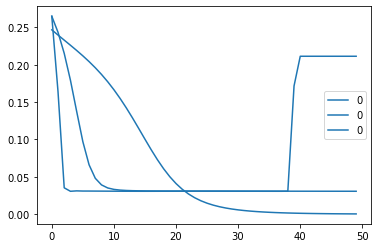

In [77]:
sns.lineplot(data=df)
sns.lineplot(data=df2)
sns.lineplot(data=df3)

**Expected Output(s)**: 

<img src="images/LossFunction.png" style="width:400px;"><caption><center><b>Figure 4</b>: Sample indicative plot of $Loss$ function vs. number of iterations (your values may differ)</center></caption><br>